In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

import numpy as np
import scipy
import itertools
import PIL.Image

# Problem1
## (a)

In [2]:
def conv2(img: np.array, kernel: np.array ):
    h, w = img.shape
    kh, kw = kernel.shape
    padded_img = np.zeros((h + 2 * kh // 2, w + 2 * kw // 2))
    padded_img[kh//2: h + kh // 2, kw//2: w + kw//2] = img
    filtered_img = np.zeros((h, w))
    for ih, iw in itertools.product(range(kh // 2, h + kh//2), range(kw // 2, kw // 2 + w)):
        grid = padded_img[ih - kh//2 : ih - kh//2 + kh, iw - kw//2 : iw - kw//2 + kw]
        filtered_img[ih - kh // 2, iw - kw // 2] = np.sum(kernel *  grid)
    return filtered_img

## (b)

In [3]:
import scipy.interpolate


def plot_filtering(img, kernel,):
    # plot images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img, cmap='gray')
    axes[0].title.set_text('Original Image')
    filtered_img = conv2(img, kernel)
    axes[1].imshow(filtered_img, cmap='gray')
    axes[1].title.set_text('Filtered Image')
    plt.show()
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    # plot magnitude spectrum
    fig, axes = plt.subplots(1, 3, figsize=(15, 7))
    # The log-magnitude spectrum of the original image, filter, and output image.
    im = axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))), cmap='gray')
    # use cv2 to interpolate the kernel for visualization
    kernel_img = cv2.resize(kernel, img.shape[::-1], interpolation=cv2.INTER_NEAREST)
    im = axes[1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(kernel_img)))), cmap='gray')
    im = axes[2].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(filtered_img)))), cmap='gray')
    axes[0].set_title('Log-Magnitude Spectrum of Original Image')
    axes[1].set_title('Log-Magnitude Spectrum of Kernel')
    axes[2].set_title('Log-Magnitude Spectrum of Filtered Image')
    fig.colorbar(im, ax=axes, orientation='horizontal')
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()    

## (c)
### Run

--2024-09-26 22:09:15--  https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88212 (86K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>]  86.14K  --.-KB/s    in 0.03s   

2024-09-26 22:09:15 (2.80 MB/s) - ‘lenna.png’ saved [88212/88212]

filtering with filter 
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


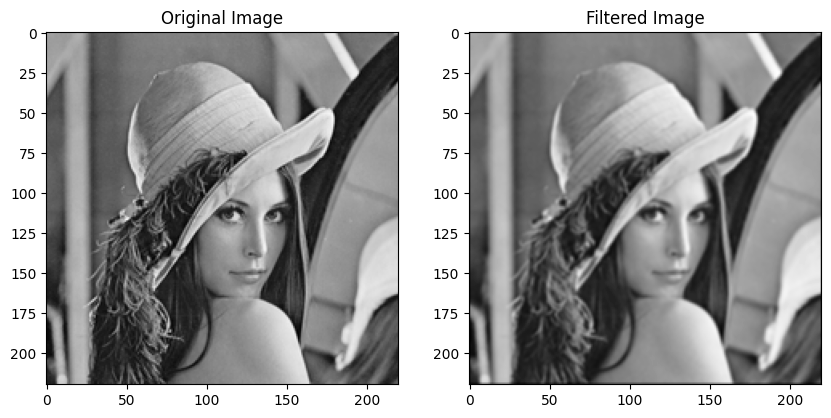

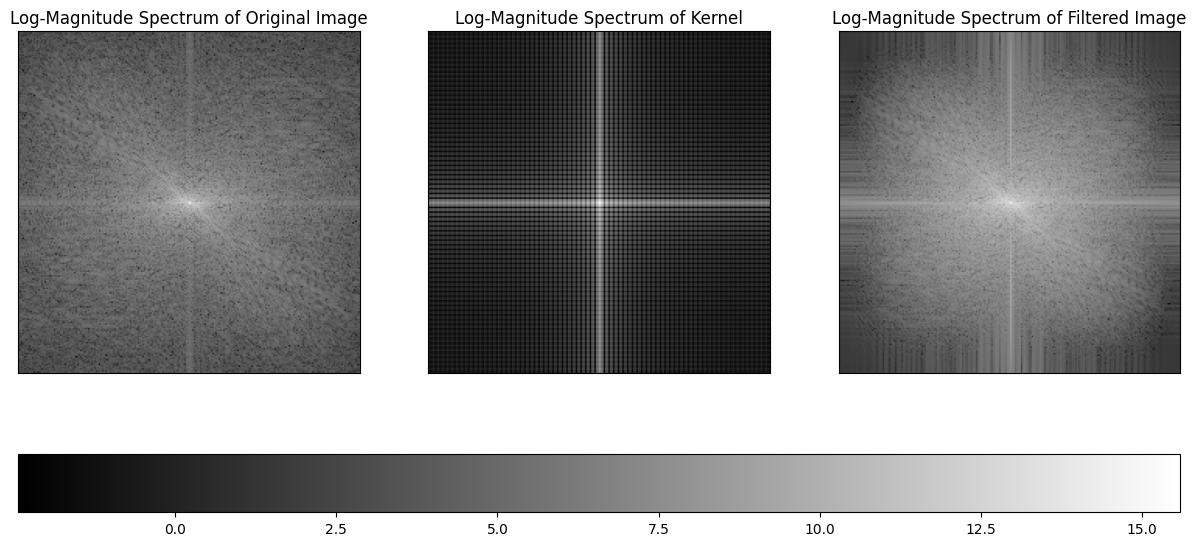

filtering with filter 
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


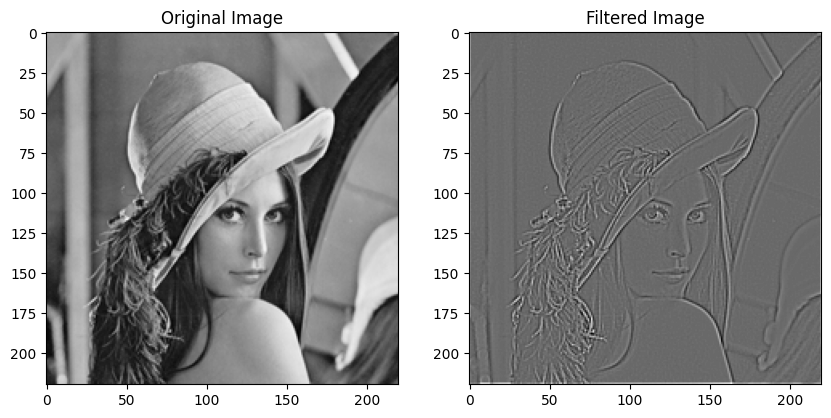

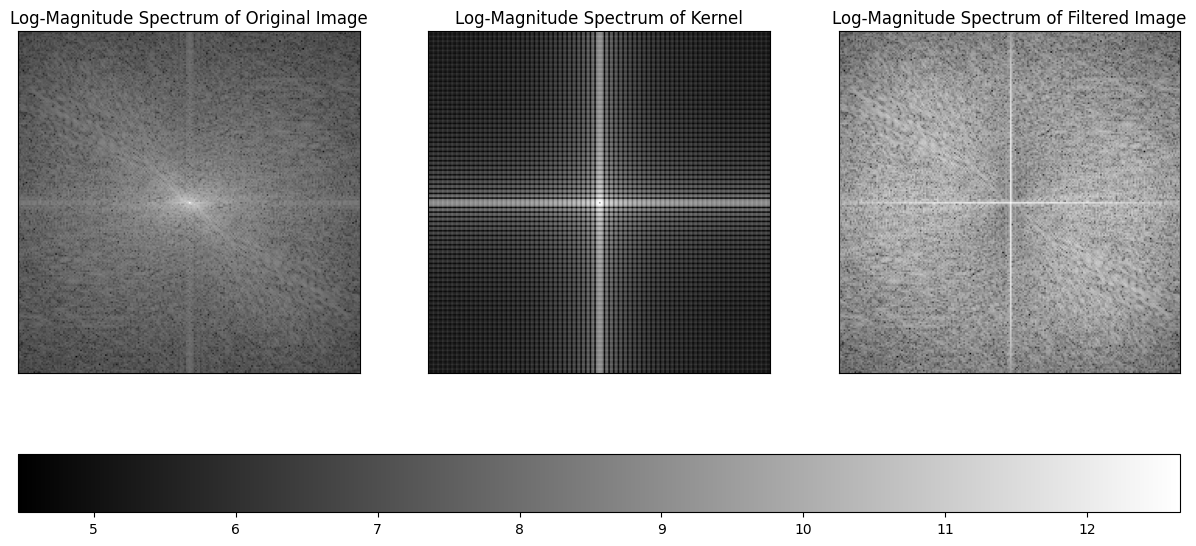

filtering with filter 
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


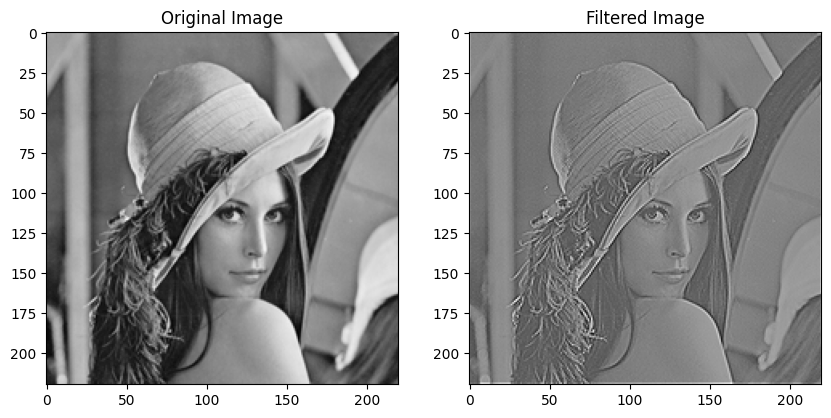

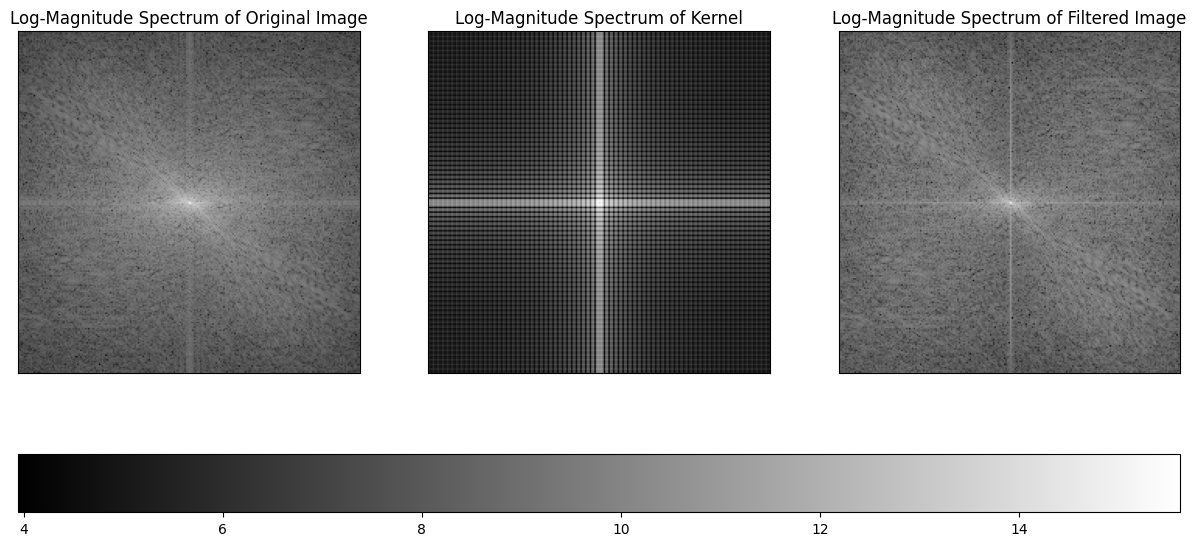

In [4]:
filters = [
    np.array(
        [[1, 2, 1],
         [2, 4, 2],
         [1, 2, 1],]
    ) / 16,
    np.array(
        [[-1, -1, -1],
         [-1, 8, -1],
         [-1, -1, -1],]
    ),
    np.array(
        [[0, -1, 0],
         [-1, 5, -1],
         [0, -1, 0],]
    ),
]

! wget https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png -O lenna.png
img = np.array(PIL.Image.open('lenna.png').convert('L'))
for filter in filters:
    print(f'filtering with filter \n{filter}')
    plot_filtering(img, filter)

### Comments
1. For $H_1$, the filtered image is a blurry version of the original image. The frequency of the filtered image has higher values on the center, both x axis and y axis. Indicating the lower frequence is higher. These two is coherent to the low pass filter's feature.
2. For $H_2$ the filtered image only contains barely visible edges of the image, with more details at the hat's high frequency area. The frequency plot shows higher value of all the area, indicating this is a high pass filter.
3. For $H_3$, the image barely has the shape of the original image, but with more details comparing to $H_2$. The frequency domain is lighter than the original frequency, while less light comparing to $H_2$. This indicates that the filter is a high pass filter with less strength compared to $H_1$.

# Problem 2
## (a)

In [5]:
def awgn(img, sigma):
    return img + np.random.randn(*img.shape) * sigma

## (b)

In [6]:
def gaussian_filter(sigma):
    size = np.ceil(5 * sigma)
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g / g.sum()

## (c)

Noise Level: 0.1, Gaussian Filter Sigma: 1
PSNR Noised: 19.945484145000215, PSNR Gaussian: 25.96448851586573, PSNR Average: 23.91286444255226


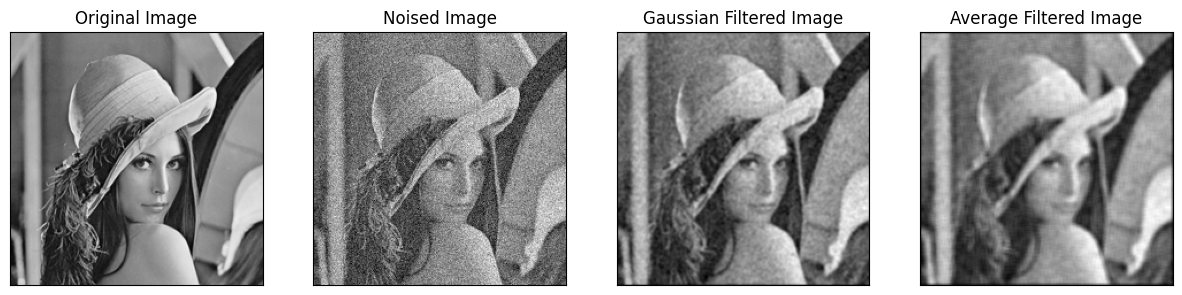

Noise Level: 0.2, Gaussian Filter Sigma: 1
PSNR Noised: 13.893713472770074, PSNR Gaussian: 23.011521729452753, PSNR Average: 22.834587272962892


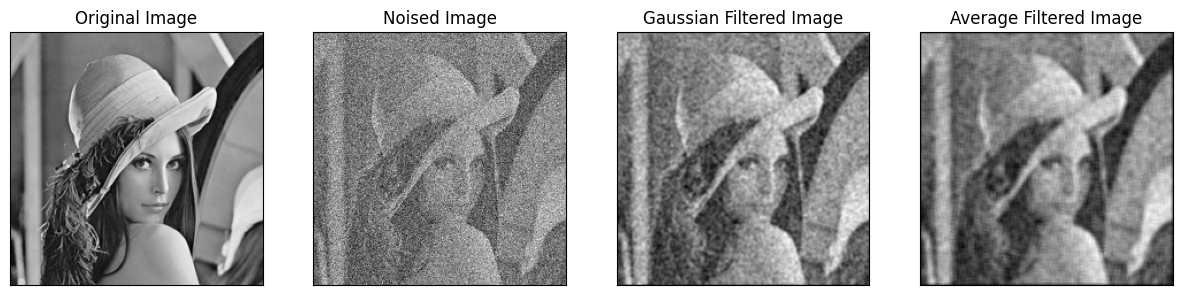

Noise Level: 0.3, Gaussian Filter Sigma: 1
PSNR Noised: 10.458459068434394, PSNR Gaussian: 20.381702676142012, PSNR Average: 21.386885791679052


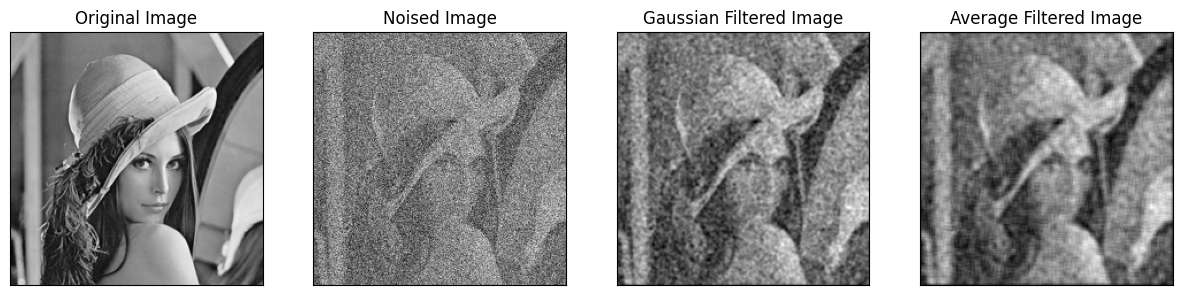

Noise Level: 0.1, Gaussian Filter Sigma: 2
PSNR Noised: 19.99905556009213, PSNR Gaussian: 21.997792768052243, PSNR Average: 20.86630370299178


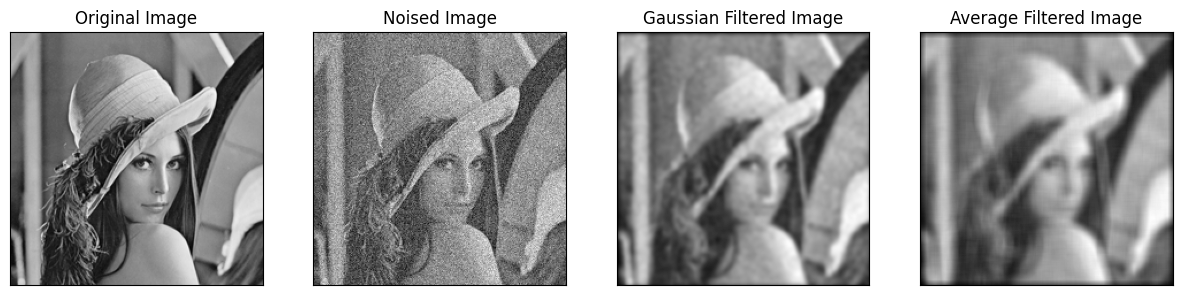

Noise Level: 0.2, Gaussian Filter Sigma: 2
PSNR Noised: 13.94839666151194, PSNR Gaussian: 21.584081418806903, PSNR Average: 20.660665544769184


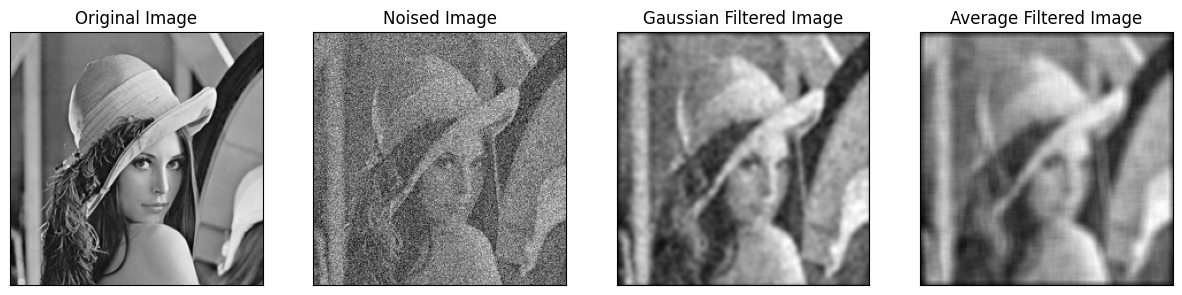

Noise Level: 0.3, Gaussian Filter Sigma: 2
PSNR Noised: 10.505229156348662, PSNR Gaussian: 21.053378515746203, PSNR Average: 20.491685288277495


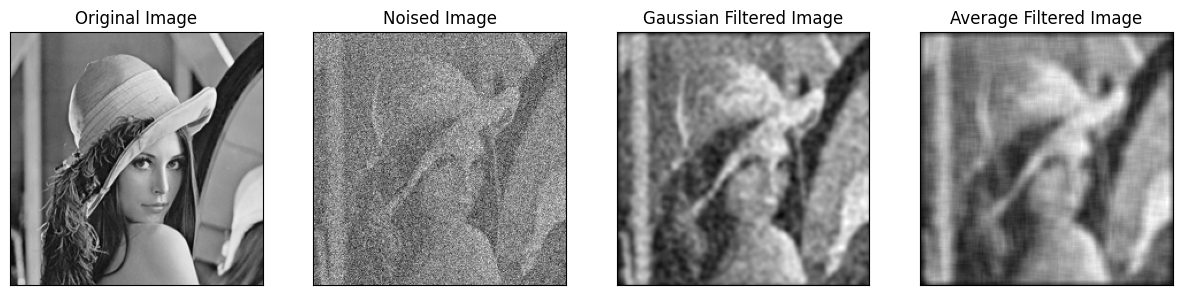

Noise Level: 0.1, Gaussian Filter Sigma: 3
PSNR Noised: 19.972286359613925, PSNR Gaussian: 21.636648774261683, PSNR Average: 19.288776971334215


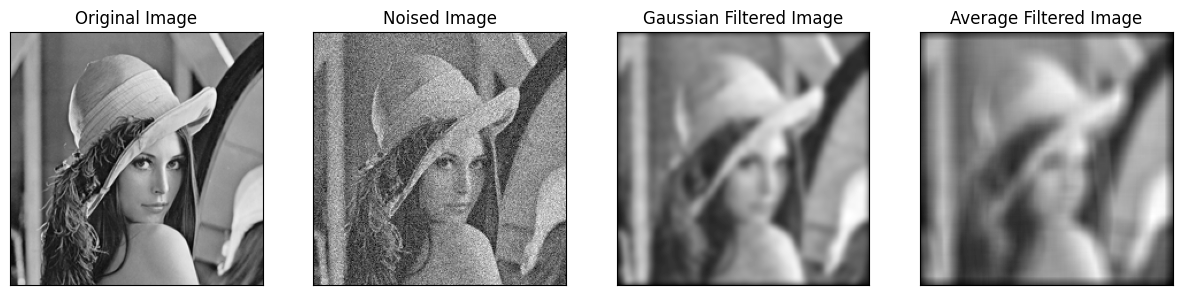

Noise Level: 0.2, Gaussian Filter Sigma: 3
PSNR Noised: 14.036875456627726, PSNR Gaussian: 21.48556030660636, PSNR Average: 19.247398054216298


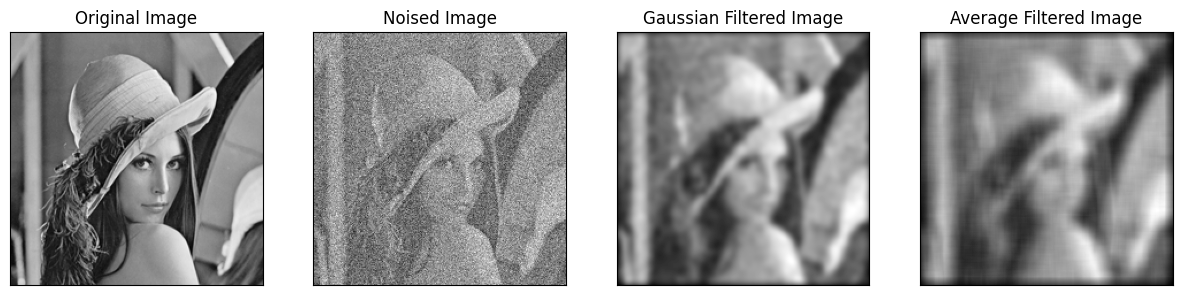

Noise Level: 0.3, Gaussian Filter Sigma: 3
PSNR Noised: 10.469722548955895, PSNR Gaussian: 21.199908235488188, PSNR Average: 19.18381341829371


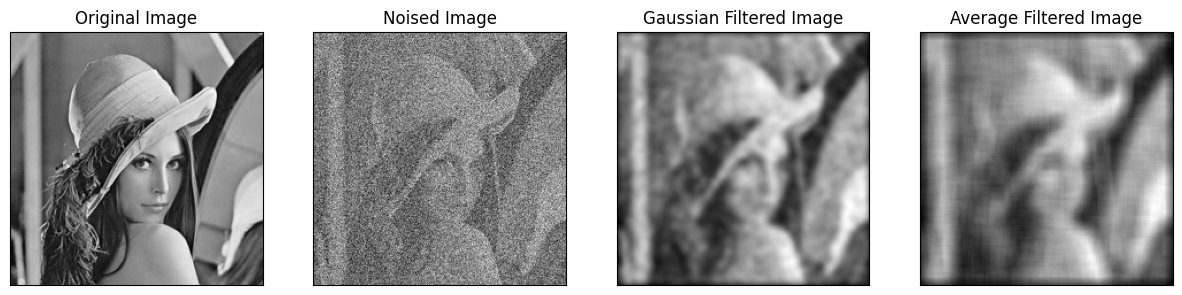

In [7]:
def denormalize_img(img):
    return (img * 255).clip(0, 255).astype(np.uint8)

def get_psnr(img, noised_img):
    mse = np.mean((img - noised_img) ** 2)
    return 10 * np.log10(1 / mse)

noise_levels = [0.1, 0.2, 0.3]
filter_gaussian_sigmas = [1, 2, 3]
# for noise_level, filter_gaussian_sigma in itertools.product(noise_levels, filter_gaussian_sigmas):
for filter_gaussian_sigma, noise_level in itertools.product(filter_gaussian_sigmas, noise_levels):
    print(f'Noise Level: {noise_level}, Gaussian Filter Sigma: {filter_gaussian_sigma}')
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    normalized_img = img / 255
    noised_img = awgn(normalized_img, noise_level)

    axes[0].imshow(img, cmap='gray')
    axes[0].title.set_text('Original Image')
    axes[1].imshow(noised_img, cmap='gray')
    axes[1].title.set_text('Noised Image')
    a_gaussian_filter = gaussian_filter(filter_gaussian_sigma)
    gaussian_filtered_img = conv2(noised_img, a_gaussian_filter)
    axes[2].imshow(gaussian_filtered_img, cmap='gray')
    axes[2].title.set_text('Gaussian Filtered Image')
    filter_size = np.ceil(5 * filter_gaussian_sigma).astype(int)
    avg_filter = np.ones((filter_size, filter_size)) / filter_size ** 2
    avg_filtered_img = conv2(noised_img, avg_filter)
    axes[3].imshow(avg_filtered_img, cmap='gray')
    axes[3].title.set_text('Average Filtered Image')
    # caclulate the PSNR, using the normalized image with values in range(0, 1)
    psnr_noised = get_psnr(normalized_img, noised_img)
    psnr_gaussian = get_psnr(normalized_img, gaussian_filtered_img)
    psnr_avg = get_psnr(normalized_img, avg_filtered_img)
    print(f'PSNR Noised: {psnr_noised}, PSNR Gaussian: {psnr_gaussian}, PSNR Average: {psnr_avg}')

    plt.show()

### Comment
1. In the first three rows, the Gaussian filter removes the noise while maintaining more details of the image.
2. Regarding the PSNR metric, the lower the PSNR is, the less noisy the image is. For Gaussian filter with size 5 (sigma=1), the PSNR for the gaussian filter is the highest among the original image/gaussian filtered image/average filtered image.
3. In most cases of the experiments, the PSNR for gaussian filtered image is the highest. While in  the case of Noise Level: 0.3, Gaussian Filter Sigma: 1 (size 5), the average filter has the highest PSNR. This indicates that with higher noise level, the gaussian filter will tend to retain details instead of removing noise comparing to average filter.
